# QOSF Mentorship Program Application Cohort 7
### Mentee: Kevin Joven

This project is the screaning task to apply to the QOSF mentorship program. [https://qosf.org/qc_mentorship/]  
The task choosed was the **Task 4 - Random Circuits**.  

Here is the problem description:  
*"Design a function that generates a random quantum circuit by considering as parameters the number of qubits, the number of depths, and the base of gates to be used. You could only use the quantum gates of 1 and 2 qubits."*  

I worked on Qiskit [https://qiskit.org/] but if you follow the same concept and framework present here you can generalize to others programing languages.  

**This is the approach:**  
I divided the problem into three differences pieces:  
- In the first place, I need to design a function that takes a **list with strings** which are the gates for put randomly in the quantum circuit.  
- Second, I need to design a function that acts like a **layer** in which a will add random gates base on the list given until reach the total qubits.
- Finally, I will call the function layer to apply random gates to all the circuit until reach the required **depth**.  

So, I need to have three specific things to build our random circuit generator:  
- A function that take the list of gates and add random gates.  
- A function that add layers of random gates to the circuit until reach the number of qubits.  
- A function that add many layers to the circuit until reach the desire depth.  

The following image show the graphic idea of how I will implemeted this random circuit generator.

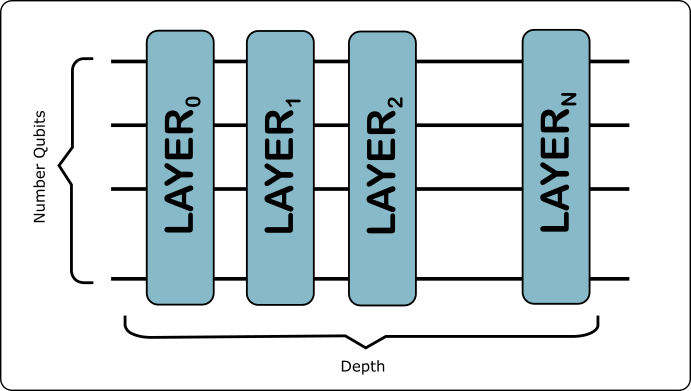

In [64]:
# This library is just for show the images, it was the easy way that I found.
from IPython.display import Image
Image(filename="Images/diagram.png")

Now I will write each function to make this possible.

In [67]:
# First we import the required libraries.
import qiskit
from qiskit import QuantumCircuit
import numpy as np
import copy
import matplotlib.pyplot as plt

In [3]:
# This is the first function that take the list and add the quantum gates.

def choose_gates(quantum_circuit : qiskit.QuantumCircuit,
                  position : int, gates_set : list):
    
    """A function that received the list of quantum gates and randomly add
    to the circuit in a specific position and give the next position available.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        position (int): initial position to put the quantum gate.
        gates_set (string list): list of standart quantum gates. 

    Returns:
        next_position (int): position for the next gate.

    """
    
    next_position = position                     # specify the actual position.
    num_qubits = quantum_circuit.num_qubits      # Number of qubits

    ran = np.random.randint(len(gates_set))      # define a random number to 
                                                 # select from the gates_set
    if gates_set[ran] == "H":                    # Is a Hadamard gate?
        quantum_circuit.h(position)              # Add the Hadamard gate to the quantum circuit.
    elif gates_set[ran] == "X":                  # Same idea from hadamard gate.
        quantum_circuit.x(position)
    elif gates_set[ran] == "Y":
        quantum_circuit.y(position)              #
    elif gates_set[ran] == "Z":
        quantum_circuit.z(position)              #
    elif gates_set[ran] == "S":
        quantum_circuit.s(position)              #
    elif gates_set[ran] == "T":
        quantum_circuit.t(position)
    elif gates_set[ran] == "RX":
        quantum_circuit.rx(np.pi*np.random.random(),position)
    elif gates_set[ran] == "RY":
        quantum_circuit.ry(np.pi*np.random.random(),position)
    elif gates_set[ran] == "RZ":
        quantum_circuit.rz(np.pi*np.random.random(),position)
    elif gates_set[ran] == "CNOT":               # Is a CNOT gate?
        if position+1 == num_qubits:             # Are we in the last qubit (no space for CNOT)?
            next_position += 1                   # Apply identity.
        else:
            ran = np.random.randint(position+1,num_qubits)
            if (np.random.random() < 0.5):       # Who are the control and target?
                quantum_circuit.cnot(position, ran)
            else:
                quantum_circuit.cnot(ran, position)
            next_position += ran-position+1      # increase the next position by the lenght of the CNOT gate.
            return next_position
    else:
        next_position += 1                       # For the identity gates.
    next_position += 1                           # Increase the counter for the one qubit gates.

    return next_position                         # return the next position for the next qubit.

The following function will be the layer function. This function will take the function written before, the quantum circuit, the gates set and, a special addition, the proportion.   
In this concept I define proportion as the "space" that is in the circuit. If there is more proportion will be less quantum random gates.  
The following image show that main idea behind this:  

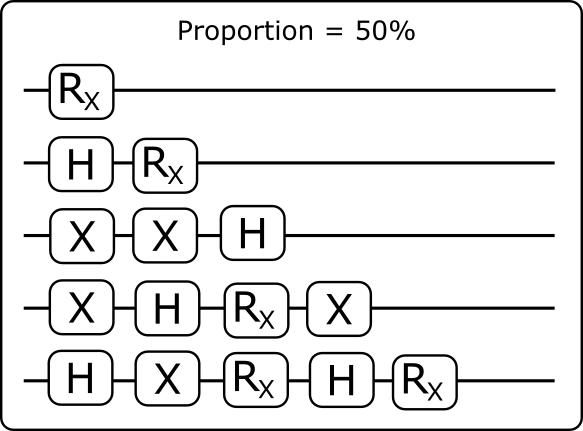

In [158]:
Image(filename="Images/proportion.png")

Now, I will make the function that make this possible. Remember that this function will be use for the main function, so the return has to be the depth of the function.

In [4]:
def layer(
        choose_gates_function,
        quantum_circuit : qiskit.QuantumCircuit,
        gates_set : list,
        proportion : float):
    
    """ A function that create a layer of quantum random gates given proportion.

    Args:
        choose_gates_function (function): the function that traslate the gates and add to the circuit.
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        gates_set (string list): list of standart quantum gates. 
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
    
    Returns:
        QuantumCircuit.depth() (int): quantum circuit currently depth.
        
    """

    actual_gates_set = gates_set.copy()                # We need to copy the real set, cuz we need to add more gates.
    actual_proportion = 0.0                            # The actual proportion
    identity_gates = 0                                 # The number of identity quantum gates.
    num_qubits = quantum_circuit.num_qubits            # The number of qubits.

    while actual_proportion < proportion:              # This while will be add identity gates until the same/more
                                                       # proportion with respect with all the gates.

        actual_gates_set.append("I")
        identity_gates += 1
        actual_proportion = identity_gates/len(actual_gates_set)

    actual_proportion = 0.0                            # Reset the proportion for the next layer.
    position = 0                                       # define the qubit where will be begin.

    while(position < num_qubits):                      # we will add quantum gates until we reach the number of qubits.
        position = choose_gates_function(              # Call the function that add the random gates.
            quantum_circuit,
            position,
            actual_gates_set)

    return quantum_circuit.depth()                     # Return the depth of the circuit.

The last step is to put all together and create the circuit until reach the desire depth. The next image will show the conceptual block diagram of the function that we are using. 

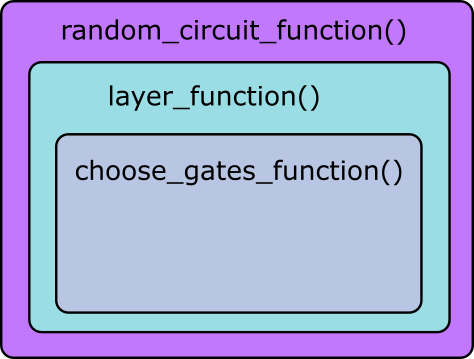

In [160]:
Image(filename="Images/final.png")

In [5]:
def random_circuit(
        choose_gates_function,
        layer_function,
        qubits : int,
        depth : int,
        gates_set : list,
        proportion : float,
        barries : bool):
    
    """ A function that creates a random quantum circuit.

    Args: 
        choose_gates_function (function) : the function for choose the gates into the layer.
        layer_function (function) : the function to add layers to the quantum circuit.
        qubits (int) : number of qubits.
        depth (int) : the desire depth of the circuit.
        gates_set (string list): list of standart quantum gates.
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
        barries (bool) : decide to add quantum barrier to the circuit every layer. 
    
        Returns:
        quantum_circuit (qiskit.QuantumCircuit) : the random quantum circuit.

    """

    quantum_circuit = QuantumCircuit(qubits)                # Create the quantum circuit
    actual_depth = 0                                        # Define the actual deep of the circuit

    while (actual_depth < depth):                           # Do while until reach the desire depth
        actual_depth = layer_function(                      # layer function
            choose_gates_function,
            quantum_circuit,
            gates_set,
            proportion)
        
        if barries == True:                                 # decide if we want gates.
            quantum_circuit.barrier()                       # add barrier to the circuit.

    return quantum_circuit

Finally, we will call the function to run the entire random circuit.

-------- YOUR RANDOM CIRCUIT -----------
Quantum Gates: {'z': 11, 's': 11, 'x': 10, 'barrier': 10, 'rx': 7, 'h': 7, 'y': 7, 'cx': 6, 't': 5, 'rz': 4, 'ry': 3}
Random circuit depth: 10


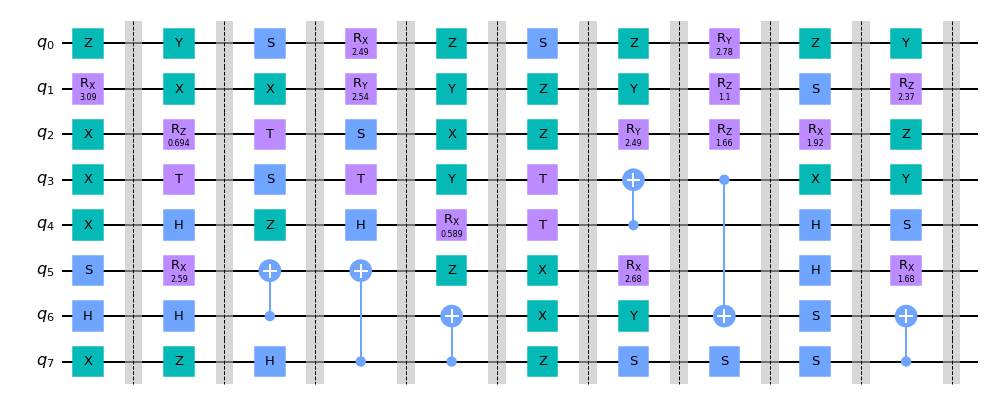

In [162]:
num_qubits = 8
circuit_depth = 10
gates_set = ["H","CNOT","X","Y","Z","RX","RY","RZ","S","T"]
proportion = 0.0
barrier = True         # CAVEAT: If you add barrier this will affect the depth of your circuit if you are using
                       # proportion. If you increase to much the proportion without barrier you will expect long time
                       # because will be add too much layers until reach the desire depth. For optimal performance
                       # keep the barrier and change as you desire the proportion. Or desactive the barrier but keep
                       # low values of the proportion.                           

circuit = random_circuit(choose_gates, layer, num_qubits, circuit_depth, gates_set, proportion, barrier)

print("-------- YOUR RANDOM CIRCUIT -----------")
print("Quantum Gates: {}".format(dict(circuit.count_ops())))
print("Random circuit depth: {}".format(circuit.depth()))
circuit.draw('mpl')

And Voilá, here is your random quantum circuit, lets try to call it with a 0.5 proportion. That means, that we expect have the half of the circuit with identity gates:

-------- YOUR RANDOM CIRCUIT -----------
Quantum Gates: {'barrier': 10, 'rz': 7, 'x': 7, 't': 4, 'y': 3, 'ry': 3, 'h': 2, 's': 2, 'cx': 1, 'z': 1, 'rx': 1}
Random circuit depth: 10


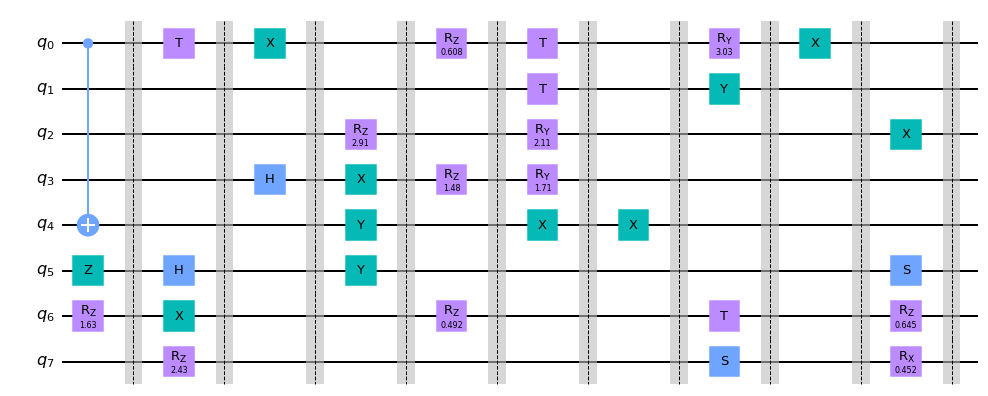

In [167]:
proportion = 0.5

circuit = random_circuit(choose_gates, layer, num_qubits, circuit_depth, gates_set, proportion, barrier)

print("-------- YOUR RANDOM CIRCUIT -----------")
print("Quantum Gates: {}".format(dict(circuit.count_ops())))
print("Random circuit depth: {}".format(circuit.depth()))
circuit.draw('mpl')

Finally, we can vary as much as we want our parameters. But there is not funny if we keep the circuit as it is right now. We want to improve the characteristic to our random circuit generator.   
In the next section, I implemeted some improvements to add to the circuit. I will explain why each improvement if made and explain in detail.  
You can vote for why implementation is your favorite!!  

# Improvement 1: Native Gates Translation

As you probably know usually the gates that we use in simulators are not the same gates that the real machine implement. Usually the machine needs to translate the gates that you are putting into the gates that it ised. That is what we call a **transpiler**.  
Each hardware architecture has his own **native gates**, the gates that has the superconducting circuit based is not the same as the ionq gates.  
The main idea in this improvement is to implement that trasnlation. We will have still a **random quantum circuit** but specified by each architecture.  
The following image we will show the main idea of this improvement.

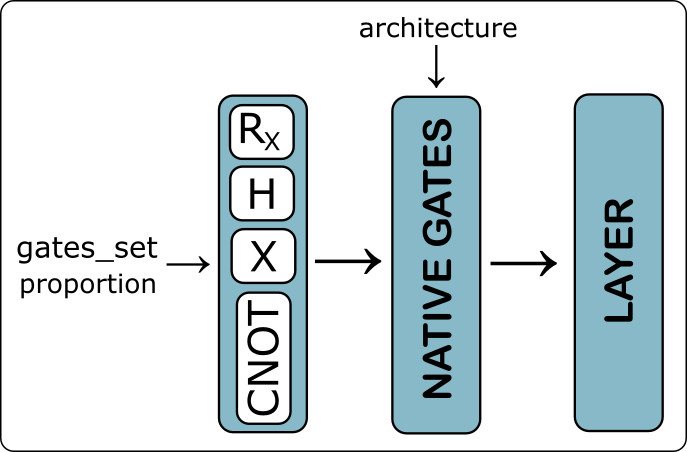

In [54]:
Image(filename="Images/layer.png")

### CAVIET:
I will let you know if the function that we are using is different from the previous one.

In [47]:
# First I will improve the first function about choose the gates to implement the others architectures.

### THIS FUNCTION IS NEW ###
def translation_standard(qc : qiskit.QuantumCircuit,
                          position : int, gate : str, random_number : float):

    """A function that add the quantum gates for a standard implementation.

    Args:
        qc (qiskit.QuantumCircuit) : quantum circuit to add the gates.
        position (int) : position in which we will put the qubit.
        gate (str) : the gate to add.
        random_number : a random number for the CNOT gate.

    Returns:
        qc (qiskit.QuantumCircuit) : the quantum circuit with the gate added.

    """

    if gate == "H":
        qc.h(position)
    elif gate == "X":
        qc.x(position)
    elif gate == "Y":
        qc.y(position)
    elif gate == "Z":
        qc.z(position)
    elif gate == "S":
        qc.s(position)
    elif gate == "T":
        qc.t(position)
    elif gate == "RX":
        qc.rx(np.pi*np.random.random(), position)
    elif gate == "RY":
        qc.ry(np.pi*np.random.random(), position)
    elif gate == "RZ":
        qc.rz(np.pi*np.random.random(), position)
    elif gate == "CNOT":
        if (np.random.random() < 0.5):
            qc.cnot(position, random_number)
        else:
            qc.cnot(random_number, position)
    return qc

Now, we will write the translation for the superconducting quantum architecture. To remember, the superconducing architecture is based on **U gates** and **CNOT gates**. So, all the original gates will be translate to that gates.

In [48]:
### THIS FUNCTION IS NEW ###
def translation_super(qc : qiskit.QuantumCircuit,
                       position : int, gate : str, random_number : float):
    """A function that add quantum gates based on a superconducting circuits
    architecture. 

    Args:
        qc (qiskit.QuantumCircuit) : quantum circuit to add the gates.
        position (int) : position in which we will put the qubit.
        gate (str) : the gate to add.
        random_number : a random number for the CNOT gate.

    Returns:
        qc (qiskit.QuantumCircuit) : the quantum circuit with the gate added.

    """
    
    if gate == "H":
        qc.u(np.pi/2, 0, np.pi, position)
    elif gate == "X":
        qc.u(0,-np.pi/2,np.pi/2, position)
    elif gate == "Y":
        qc.u(np.pi,np.pi/2,np.pi/2, position)
    elif gate == "Z":
        qc.u(0, 0, np.pi, position)
    elif gate == "S":
        qc.u(0, 0, np.pi/2, position)
    elif gate == "T":
        qc.u(0, 0, np.pi/4, position)
    elif gate == "RX":
        qc.u(np.pi*np.random.random(), -np.pi/2, np.pi/2, position)
    elif gate == "RY":
        qc.u(np.pi*np.random.random(), 0, 0, position)
    elif gate == "RZ":
        qc.u(0, 0, np.pi*np.random.random(), position)
    elif gate == "CNOT":
        if (np.random.random() < 0.5):
            qc.cnot(position, random_number)
        else:
            qc.u(np.pi/2, 0, np.pi, position)
            qc.u(np.pi/2, 0, np.pi, random_number)
            qc.cnot(position, random_number)            # This function is based in a identity.
            qc.u(np.pi/2, 0, np.pi, position)
            qc.u(np.pi/2, 0, np.pi, random_number)
    return qc

The other famous architecure is the ionq's architecture. This architecture is base on **RX, RY, RZ and RXX gates**. Know we will write the function that is taking care of the translation for this architecture. 

In [56]:
### THIS FUNCTION IS NEW ###
def translation_ionq(qc : qiskit.QuantumCircuit,
                       position : int, gate : str, random_number : float):
    """A function that add quantum gates based on a ionq architecture. 
    
    Args:
        qc (qiskit.QuantumCircuit) : quantum circuit to add the gates.
        position (int) : position in which we will put the qubit.
        gate (str) : the gate to add.
        random_number : a random number for the CNOT gate.

    Returns:
        qc (qiskit.QuantumCircuit) : the quantum circuit with the gate added.

    """
    
    if gate == "H":
        qc.ry(np.pi/2, position)
        qc.rx(np.pi, position)
    elif gate == "X":
        qc.rx(np.pi, position)
    elif gate == "Y":
        qc.ry(np.pi, position)
    elif gate == "Z":
        qc.rz(np.pi, position)
    elif gate == "S":
        qc.rz(np.pi/2, position)
    elif gate == "T":
        qc.rz(np.pi/4, position)
    elif gate == "RX":
        qc.rx(np.pi*np.random.random(), position)
    elif gate == "RY":
        qc.ry(np.pi*np.random.random(), position)
    elif gate == "RZ":
        qc.rz(np.pi*np.random.random(), position)
    elif gate == "CNOT":
        if (np.random.random() < 0.5):
            qc.ry(np.pi/2, position)
            qc.rxx(np.pi/4, position, random_number)
            qc.rx(-np.pi/2, position)
            qc.rx(-np.pi/2, random_number)
            qc.ry(-np.pi/2, position)
        else:
            qc.ry(np.pi/2, position)
            qc.rx(np.pi, position)
            qc.ry(np.pi/2, random_number)
            qc.rx(np.pi, random_number)
            qc.u(np.pi/2, 0, np.pi, random_number)
            qc.ry(np.pi/2, position)
            qc.rxx(np.pi/4, position, random_number)
            qc.rx(-np.pi/2, position)
            qc.rx(-np.pi/2, random_number)
            qc.ry(-np.pi/2, position)
            qc.ry(np.pi/2, position)
            qc.rx(np.pi, position)
            qc.ry(np.pi/2, random_number)
            qc.rx(np.pi, random_number)
    return qc

In [57]:
### This function is NEW ###
def translation_gates(qc : qiskit.QuantumCircuit,
                    position : int, gate : str,
                    architecture : str, random_number : float):
    """A function that decide between which architecture implement.

    Args:
        qc (qiskit.QuantumCircuit) : quantum circuit to add the gates.
        position (int) : position in which we will put the qubit.
        gate (str) : the gate to add.
        architecture (str) : the desire architecture.
        random_number : a random number for the CNOT gate.

    Returns:
        The function that implement the gates in each architecture.
    
    """

    if architecture == "super":
        return translation_super(qc, position, gate, random_number)
    elif architecture == "standard":
        return translation_standard(qc, position, gate, random_number)
    elif architecture == "ionq":
        return translation_ionq(qc, position, gate, random_number)

In [50]:
### This function is similar to the previous one, the different is that know we
### call the function that add every gate depending on the architecture instead of
### add the gates manually.

def choose_gates_IMP1(quantum_circuit : qiskit.QuantumCircuit,
                  position : int, gates_set : list, architecture : str):
    """A function that choose the quantum gates given a specific gates set.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        position (int): initial position to put the quantum gate.
        gates_set (string list): list of standart quantum gates.
        architecture (str) : the desire architecture. 

    Returns:
        next_position (int): position for the next gate.
    
    """
    next_position = position                # specify the actual position.
    num_qubits = quantum_circuit.num_qubits # Number of qubits

    ran = np.random.randint(len(gates_set)) # define a random number to 
                                            # select from the gates_set

    if gates_set[ran] == "CNOT":            # Is a CNOT gate? 
        if position+1 == num_qubits:        # Are we in the last qubit (no space for CNOT)?
            next_position += 1              # Apply identity.
        else:
            random_number = np.random.randint(position+1,
                                            quantum_circuit.num_qubits) # This random number is for the CNOT position.
            translation_gates(quantum_circuit,
                             position, 
                             gates_set[ran], 
                             architecture, 
                             random_number)
            next_position += random_number-position+1   
    else:
        translation_gates(quantum_circuit, 
                          position, 
                          gates_set[ran], 
                          architecture, 
                          0)                # We dont need here the random position for the CNOT cuz we already know that isnt.
        next_position += 1                  # increase the next position by 1

    return next_position                    # return the next position for the next qubit.

In [51]:
### This function is the same we just change the choose_function to add the architecture implementation.

def layer_IMP1(
        choose_gates_function,
        quantum_circuit : qiskit.QuantumCircuit,
        gates_set : list,
        proportion : float,
        architecture):
    
    """ A function that create a layer of quantum random gates given proportion.

    Args:
        choose_gates_function (function): the function that traslate the gates and add to the circuit.
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        gates_set (string list): list of standart quantum gates. 
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
        architecture (str) : the desire architecture.
    
    Returns:
        QuantumCircuit.depth() (int): quantum circuit currently depth.
        
    """

    actual_gates_set = gates_set.copy()                # We need to copy the real set, cuz we need to add more gates.
    actual_proportion = 0.0                            # The actual proportion
    identity_gates = 0                                 # The number of identity quantum gates.
    num_qubits = quantum_circuit.num_qubits            # The number of qubits.

    while actual_proportion < proportion:              # This while will be add identity gates until the same/more
                                                       # proportion with respect with all the gates.

        actual_gates_set.append("I")
        identity_gates += 1
        actual_proportion = identity_gates/len(actual_gates_set)

    actual_proportion = 0.0                            # Reset the proportion for the next layer.
    position = 0                                       # define the qubit where will be begin.

    while(position < num_qubits):                      # we will add quantum gates until we reach the number of qubits.
        position = choose_gates_function(              # Call the function that add the random gates.
            quantum_circuit,
            position,
            actual_gates_set,
            architecture)

    return quantum_circuit.depth()                     # Return the depth of the circuit.

In [52]:
### This function is the same we just change the layer_function to add the architecture implementation.

def random_circuit_IMP1(
        choose_gates_function,
        layer_function,
        qubits : int,
        depth : int,
        gates_set : list,
        proportion : float,
        barries : bool,
        architecture : str):
    
    """ A function that creates a random quantum circuit.

    Args: 
        choose_gates_function (function) : the function for choose the gates into the layer.
        layer_function (function) : the function to add layers to the quantum circuit.
        qubits (int) : number of qubits.
        depth (int) : the desire depth of the circuit.
        gates_set (string list): list of standart quantum gates.
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
        barries (bool) : decide to add quantum barrier to the circuit every layer.
        architecture (str) : the desire architecture.
    
        Returns:
        quantum_circuit (qiskit.QuantumCircuit) : the random quantum circuit.

    """

    quantum_circuit = QuantumCircuit(qubits)                # Create the quantum circuit
    actual_depth = 0                                        # Define the actual deep of the circuit

    while (actual_depth < depth):                           # Do while until reach the desire depth
        actual_depth = layer_function(                      # layer function
            choose_gates_function,
            quantum_circuit,
            gates_set,
            proportion,
            architecture)
        
        if barries == True:                                 # decide if we want gates.
            quantum_circuit.barrier()                       # add barrier to the circuit.

    return quantum_circuit

-------- YOUR RANDOM CIRCUIT -----------
Quantum Gates: {'u': 39, 'barrier': 6, 'cx': 4}
Random circuit depth: 10
Architecture: super


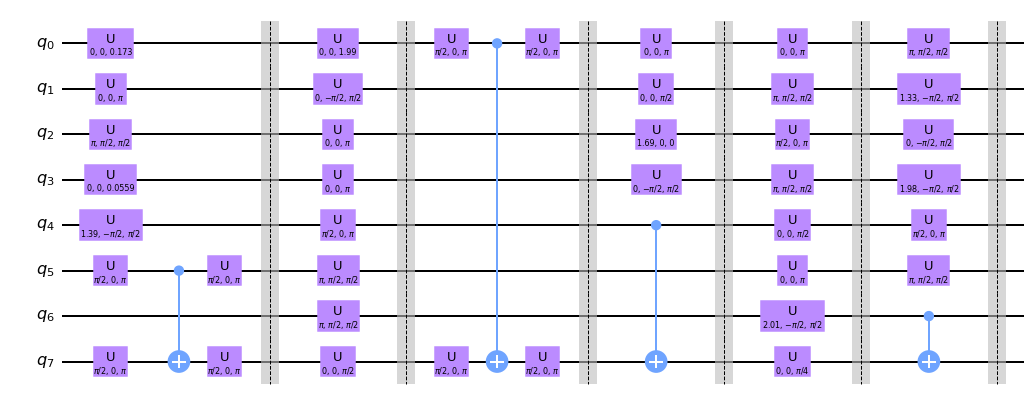

In [53]:
num_qubits = 8
circuit_depth = 10
gates_set = ["H","CNOT","X","Y","Z","S","T","RX","RY","RZ"]
proportion = 0.0
architecture = "super"
barrier = True

# seed for repetition.
seed = np.random.seed(127)

circuit = random_circuit_IMP1(choose_gates_IMP1, layer_IMP1, num_qubits, circuit_depth, gates_set, proportion, barrier, architecture)

print("-------- YOUR RANDOM CIRCUIT -----------")
print("Quantum Gates: {}".format(dict(circuit.count_ops())))
print("Random circuit depth: {}".format(circuit.depth()))
print("Architecture: {}".format(architecture))
circuit.draw('mpl')

It is not funny if we can't compare with the simulator version. So let's see:

-------- YOUR RANDOM CIRCUIT -----------
Quantum Gates: {'y': 7, 'z': 6, 'barrier': 6, 'rx': 4, 'cx': 4, 'rz': 3, 'x': 3, 'h': 3, 's': 3, 'ry': 1, 't': 1}
Random circuit depth: 6
Architecture: standard


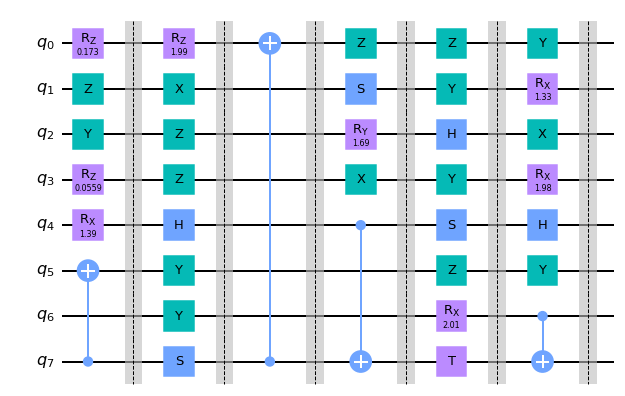

In [55]:
num_qubits = 8
circuit_depth = 6       # We reduce the depth to have similar gates in both sides.
gates_set = ["H","CNOT","X","Y","Z","S","T","RX","RY","RZ"]
proportion = 0.0
architecture = "standard"
barrier = True

seed = np.random.seed(127)

circuit = random_circuit_IMP1(choose_gates_IMP1, layer_IMP1, num_qubits, circuit_depth, gates_set, proportion, barrier, architecture)

print("-------- YOUR RANDOM CIRCUIT -----------")
print("Quantum Gates: {}".format(dict(circuit.count_ops())))
print("Random circuit depth: {}".format(circuit.depth()))
print("Architecture: {}".format(architecture))
circuit.draw('mpl')

-------- YOUR RANDOM CIRCUIT -----------
Quantum Gates: {'ry': 16, 'rx': 15, 'rz': 7, 'barrier': 3, 'u': 2, 'rxx': 2}
Random circuit depth: 18
Architecture: ionq


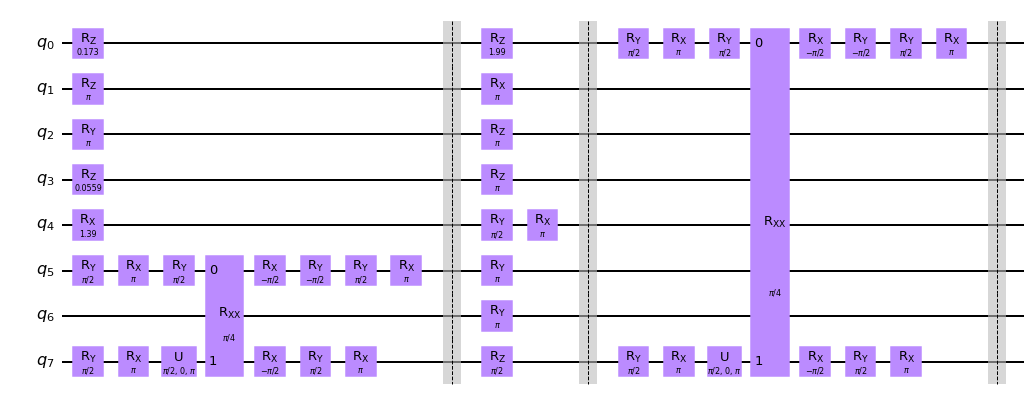

In [62]:
num_qubits = 8
circuit_depth = 18       # We increased the depth cuz the ionq's arch have many gates to we will compare just the 3 first layers.
gates_set = ["H","CNOT","X","Y","Z","S","T","RX","RY","RZ"]
proportion = 0.0
architecture = "ionq"
barrier = True

seed = np.random.seed(127)

circuit = random_circuit_IMP1(choose_gates_IMP1, layer_IMP1, num_qubits, circuit_depth, gates_set, proportion, barrier, architecture)

print("-------- YOUR RANDOM CIRCUIT -----------")
print("Quantum Gates: {}".format(dict(circuit.count_ops())))
print("Random circuit depth: {}".format(circuit.depth()))
print("Architecture: {}".format(architecture))
circuit.draw('mpl')

Nice! We achieved to implemented the native translation. If you want you can add more native translations for every architecture. Here we just implement the most common ones.

# Improvement 2 : Coupling Map

Now, as you can saw in the previous improvement, always there is something different when we try taking care of the hardware side. Here is another example. The topology of the qubits. Somethings when we want to implement a CNOT gate between two qubits, thoses qubits are not always "side-by-side". We need to implement a strategy two comunicaty this two qubits.  
For example if you see the following image, you can see that the is easily to communicate qubits X and Y in the first architecture than in the second one.  
The way that we describe every architecture is knowing as the **coupling map** that also you can see in the following image:

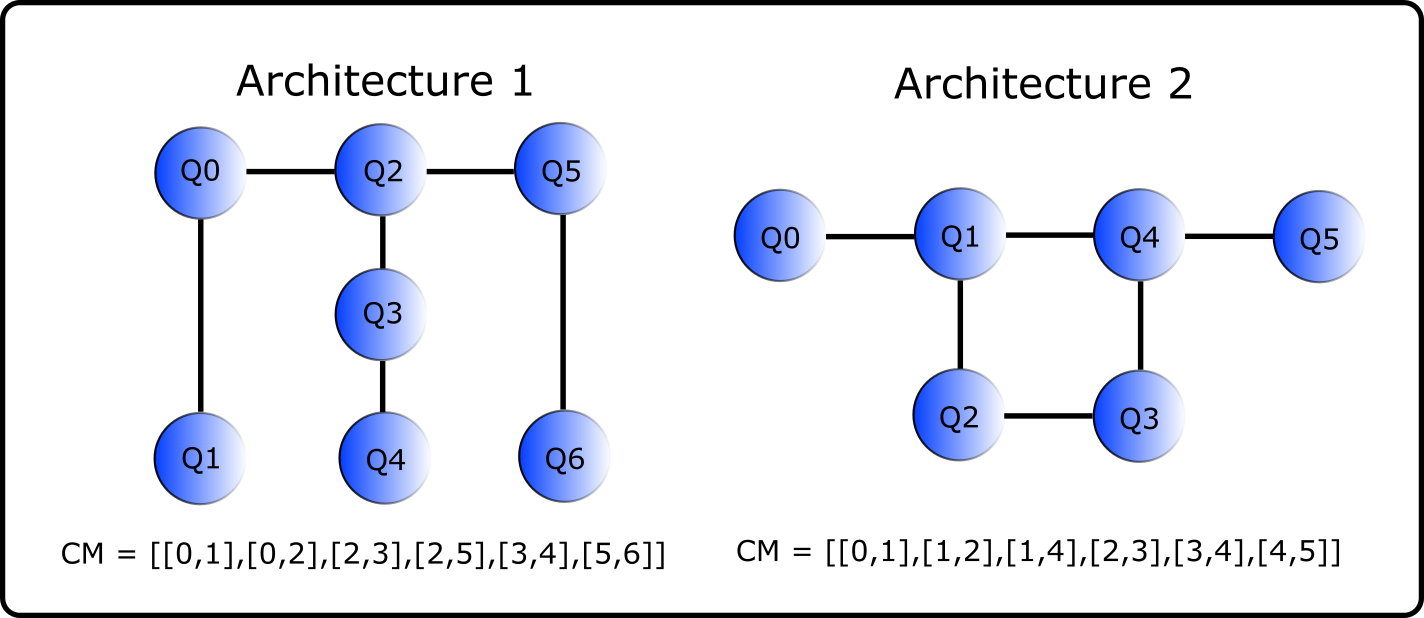

In [66]:
Image(filename="Images/cmap.png")

In [5]:
#qc = QuantumCircuit(6)

#coupling_map = [[0,1],[1,2],[1,4],[2,3],[1,4],[4,5]]

def coupling(qc, coupling_map, need):

    valid = False
    actual_coupling_map = copy.deepcopy(coupling_map)
    save_swag = []

    position = 0
    while (valid == False):
        if(need in actual_coupling_map):
            index = actual_coupling_map.index(need)
            qc.cnot(coupling_map[index][0],coupling_map[index][1])
            len_swag = len(save_swag)
            for i in range(len_swag):
                qc.swap(save_swag[len_swag-i-1][0],save_swag[len_swag-i-1][1])
            valid = True
            
        else:
            f = actual_coupling_map[position][0]
            s = actual_coupling_map[position][1]
            for i in range(len(actual_coupling_map)):
                for j in range(2):
                    if actual_coupling_map[i][j] == f:
                        actual_coupling_map[i][j] = s
                    elif actual_coupling_map[i][j] == s:
                        actual_coupling_map[i][j] = f
            qc.swap(coupling_map[position][0],coupling_map[position][1])
            save_swag.append([coupling_map[position][0],coupling_map[position][1]])
            position += 1
            if position == len(coupling_map):
                position = 0

    return qc

#need = [1,5]
#coupling(qc, coupling_map, need).draw('mpl')

In [41]:
def choose_gates_IMP2(quantum_circuit : qiskit.QuantumCircuit,
                  position : int, gates_set : list,
                  coupling_map : list):
    """A function that choose the quantum gates given a specific gates set.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        position (int): initial position to put the quantum gate.
        gates_set (string list): list of standart quantum gates. 
        coupling_map (list): [FINISH]

    Returns:
        next_position (int): position for the next gate.
    
    """
    next_position = position                # specify the actual position.
    num_qubits = quantum_circuit.num_qubits # Number of qubits

    ran = np.random.randint(len(gates_set))  # define a random number to 
                                            # select from the gates_set
    if gates_set[ran] == "H":               # Is a Hadamard gate?
        quantum_circuit.h(position)         # Add the Hadamard gate to the quantum circuit. ###### CALLL TRASLATION.
    elif gates_set[ran] == "X":
        quantum_circuit.x(position)
    elif gates_set[ran] == "CNOT":          # Is a CNOT gate?                               ###### CALL COUPLING MAP
        if position+1 == num_qubits:        # Are we in the last qubit (no space for CNOT)?
            next_position += 1              # Apply identity.
        else:
            #if (np.random.random() < 0.5):
            coupling(quantum_circuit, coupling_map, [position, position+1])
                #quantum_circuit.cnot(position, position+1)
            #else:
                #coupling(quantum_circuit, coupling_map, [position+1, position])
                #quantum_circuit.cnot(position+1, position)
            next_position += 2              # increase the next position by 2 (two qubit gate)
            return next_position
    elif gates_set[ran] == "Y":
        quantum_circuit.y(position)
    elif gates_set[ran] == "Z":
        quantum_circuit.z(position)
    else:
        next_position += 1
    next_position += 1

    return next_position                    # return the next position for the next qubit.

In [42]:
def layer_IMP2(quantum_circuit : qiskit.QuantumCircuit, gates_set : list,
                proportion : float, coupling_map : list):
    """ A function that create a layer of quantum random gates.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        gates_set (string list): list of standart quantum gates. 
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
    
    Returns:
        QuantumCircuit.depth() (int): quantum circuit currently depth.
        
    """

    actual_gates_set = gates_set.copy()
    actual_proportion = 0.0
    identity_gates = 0
    num_qubits = quantum_circuit.num_qubits

    while actual_proportion < proportion:
        actual_gates_set.append("I")
        identity_gates += 1
        actual_proportion = identity_gates/len(actual_gates_set)

    actual_proportion = 0.0
    position = 0

    while(position < num_qubits):
        position = choose_gates_IMP2(quantum_circuit, position, actual_gates_set, coupling_map)
    quantum_circuit.barrier()

    return quantum_circuit.depth()

In [43]:
def random_circuit_IMP2(qubits : int, depth : int, gates_set : list,
                         proportion : float, coupling_map : list):
    """ A function that creates a random quantum circuit.

    Args: 
        qubits (int) : number of qubits.
        depth (int) : the desire depth of the circuit.
        gates_set (string list): list of standart quantum gates.
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
    
        Returns:
        quantum_circuit (qiskit.QuantumCircuit) : the random quantum circuit.

    """

    quantum_circuit = QuantumCircuit(qubits)

    actual_depth = 0

    while (actual_depth < depth):
        actual_depth = layer_IMP2(quantum_circuit, gates_set, proportion, coupling_map)

    return quantum_circuit

Random circuit depth: 12


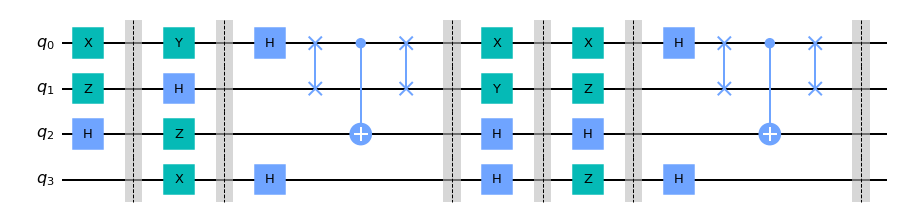

In [56]:
num_qubits = 4
circuit_depth = 10
gates_set = ["H","CNOT","X","Y","Z"]
coupling_map_test = [[0,1],[0,2],[0,3],[1,3]]
proportion = 0.0

circuit = random_circuit_IMP2(num_qubits, circuit_depth, gates_set, proportion, coupling_map_test)
print("Random circuit depth: {}".format(circuit.depth()))
circuit.draw('mpl')

Random circuit depth: 17


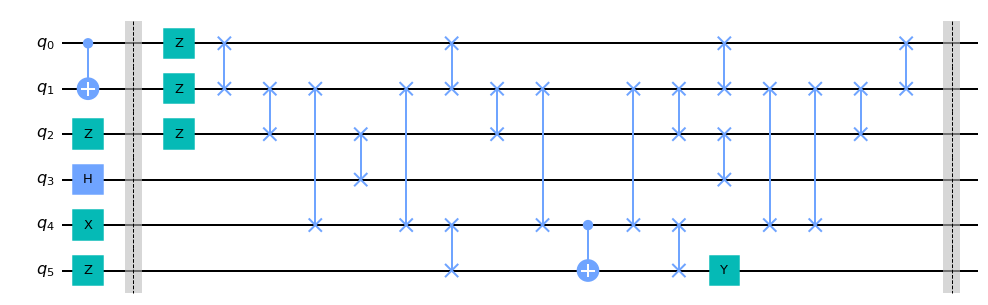

In [61]:
# Test with the real one:
num_qubits = 6
circuit_depth = 10
gates_set = ["H","CNOT","X","Y","Z"]
real_coupling_map = [[0,1],[1,2],[1,4],[2,3],[1,4],[4,5]]
proportion = 0.0

circuit = random_circuit_IMP2(num_qubits, circuit_depth, gates_set, proportion, real_coupling_map)
print("Random circuit depth: {}".format(circuit.depth()))
circuit.draw('mpl')